In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *
from payment_utils import get_payment


In [ ]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 5.0, D)

# v3を複数の値でサンプリング（3次元可視化のため）
v3_values = np.array([0, 1, 2, 3, 4])  # v3を0, 1, 2, 3, 4の5つの値でサンプリング
print(f'v3_values: {v3_values}')

cfg = additive_1x3_gamma_1_0_1_0_config.cfg
cfg.test.batch_size = D
cfg.test.save_output = True


v3_values: [0 1 2 3 4]


In [13]:
Net = additive_net.Net
Generator = gamma_11_generator.Generator
Trainer = trainer.Trainer


In [14]:
# 各v3値に対してテストデータを生成し、推論を実行
# 各v3値での結果を保存
alloc_dict = {}
pay_dict = {}

for v3_val in v3_values:
    # 3財のテストデータを生成: [v1, v2, v3]
    X_tst = np.stack([v.flatten() for v in np.meshgrid(x, x)], axis=-1)
    # v3を固定値で追加
    X_tst = np.concatenate([X_tst, np.full((X_tst.shape[0], 1), v3_val)], axis=-1)
    
    # 推論を実行（各v3値ごとに新しいnetとtrainerを作成）
    net = Net(cfg, "test")
    m = Trainer(cfg, "test", net)
    generator = Generator(cfg, 'test', X_tst)
    cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
    m.test(generator)
    
    # 結果を即座に読み込み（次のテストで上書きされる前に保存）
    alloc_file = os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")
    pay_file = os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")
    
    # ファイルが存在することを確認
    if os.path.exists(alloc_file) and os.path.exists(pay_file):
        alloc = np.load(alloc_file).reshape(D, D, 3)
        pay = np.load(pay_file).reshape(D, D)
        
        alloc_dict[v3_val] = alloc.copy()  # コピーを作成
        pay_dict[v3_val] = pay.copy()  # コピーを作成
        print(f"Completed v3 = {v3_val:.2f}")
    else:
        print(f"Error: Files not found for v3 = {v3_val:.2f}")


2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:TEST ALL-400000: t = 0.2790, Net_Loss: -1.895481, Revenue: 1.895481
2025-11-12 21:41:50,612:INFO:T

Completed v3 = 0.00
Completed v3 = 1.00


2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:TEST ALL-400000: t = 0.1764, Net_Loss: -2.250633, Revenue: 2.250633
2025-11-12 21:41:50,979:INFO:T

Completed v3 = 2.00
Completed v3 = 3.00


2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:TEST ALL-400000: t = 0.1404, Net_Loss: -2.255714, Revenue: 2.255714
2025-11-12 21:41:51,314:INFO:T

Completed v3 = 4.00


In [ ]:
# データは既に読み込まれているので、ここでは何もしない
# alloc_dictとpay_dictに各v3値での結果が保存されている


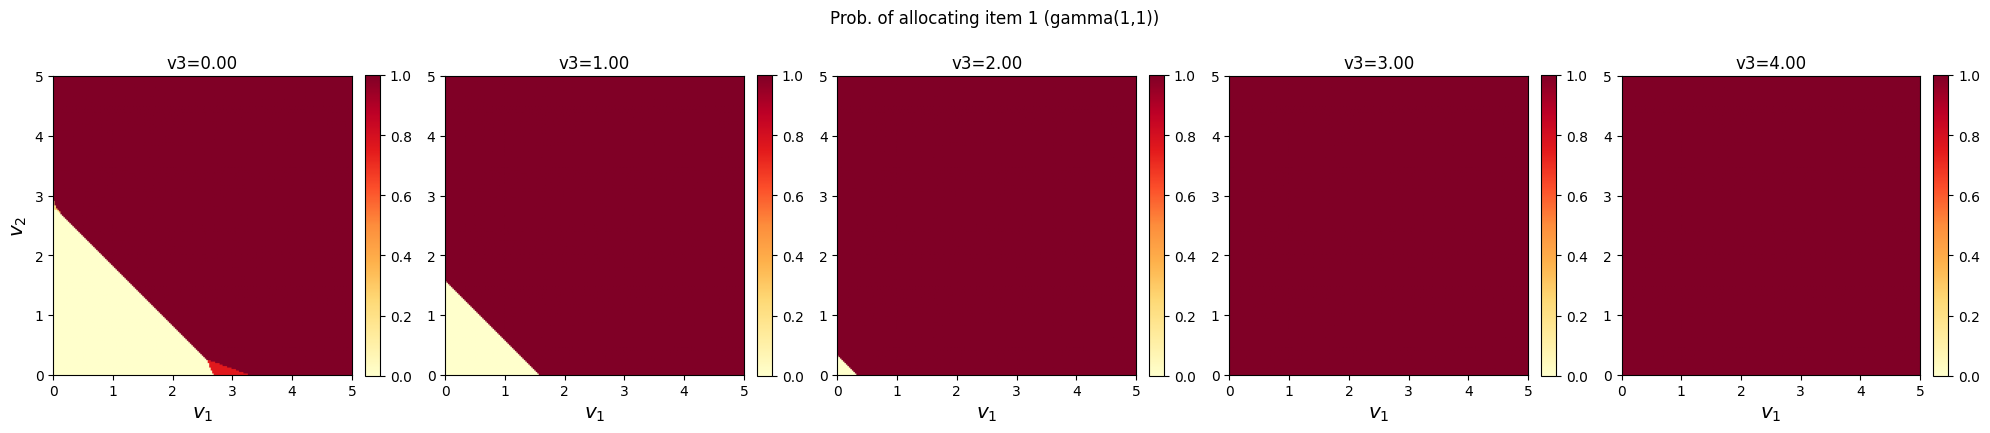

In [15]:
# 財1の配分確率を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(alloc[::-1, :, 0], extent=[0, 5, 0, 5], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle('Prob. of allocating item 1 (gamma(1,1))', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


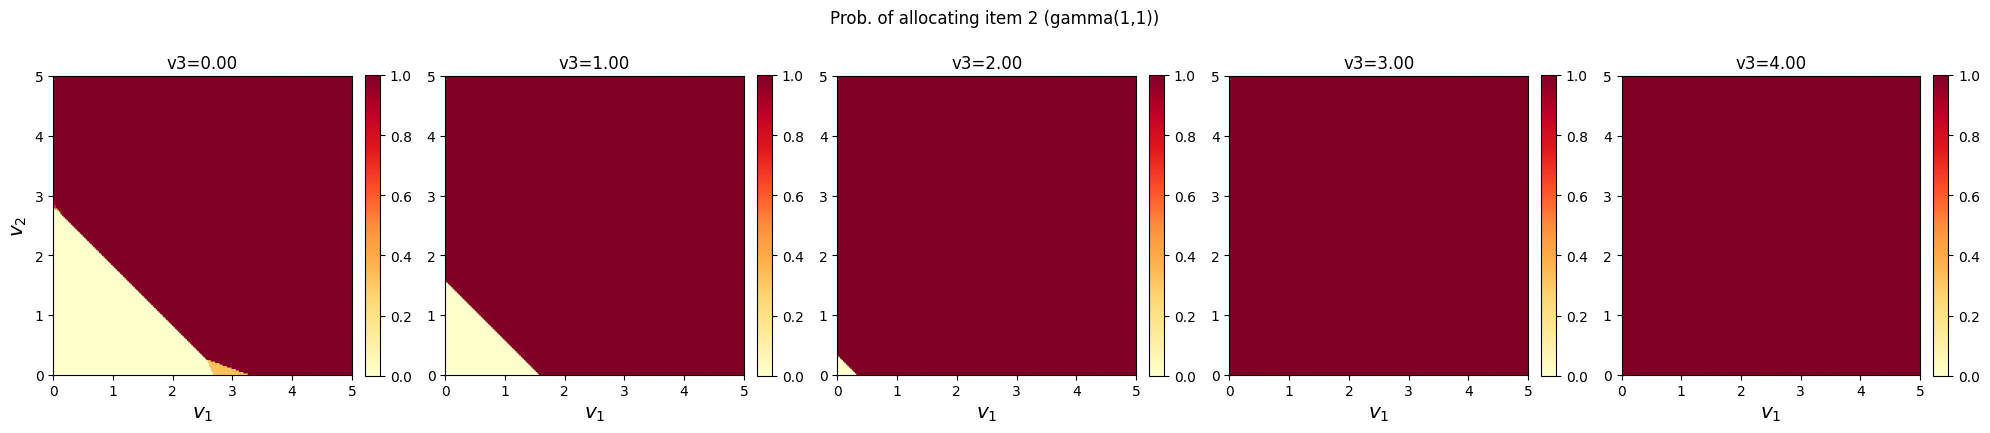

In [16]:
# 財2の配分確率を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(alloc[::-1, :, 1], extent=[0, 5, 0, 5], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle('Prob. of allocating item 2 (gamma(1,1))', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


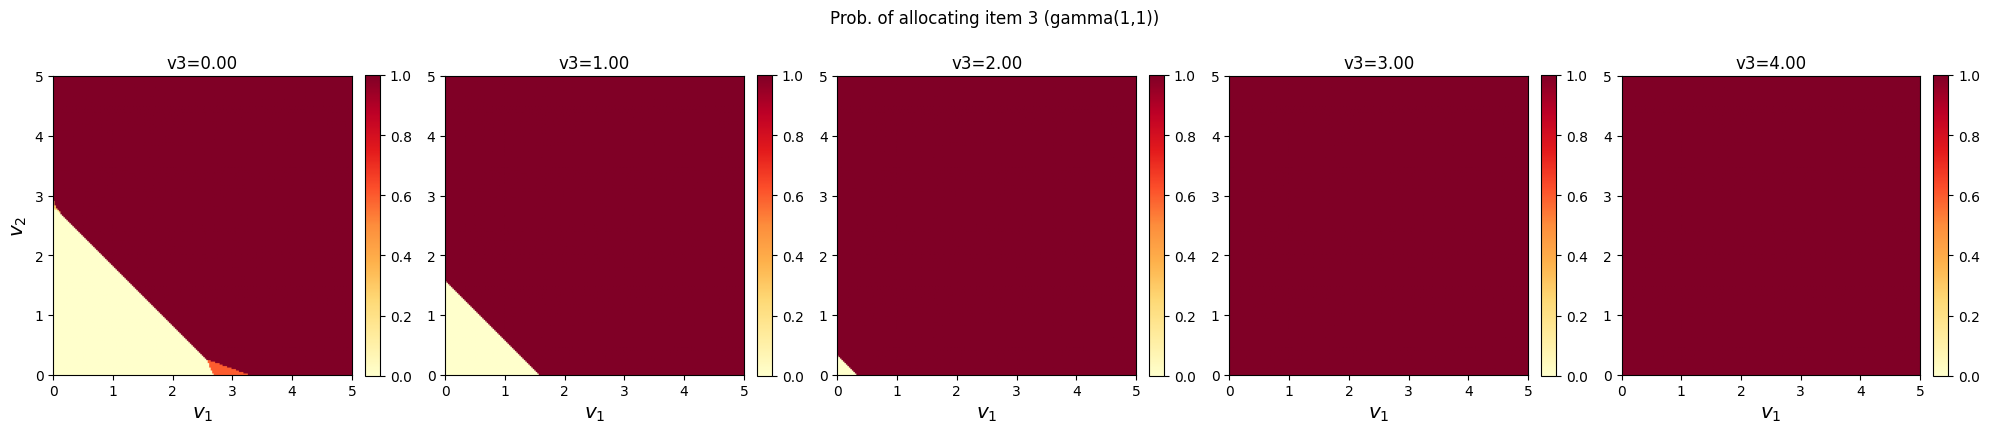

In [17]:
# 財3の配分確率を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(alloc[::-1, :, 2], extent=[0, 5, 0, 5], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle('Prob. of allocating item 3 (gamma(1,1))', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc3_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


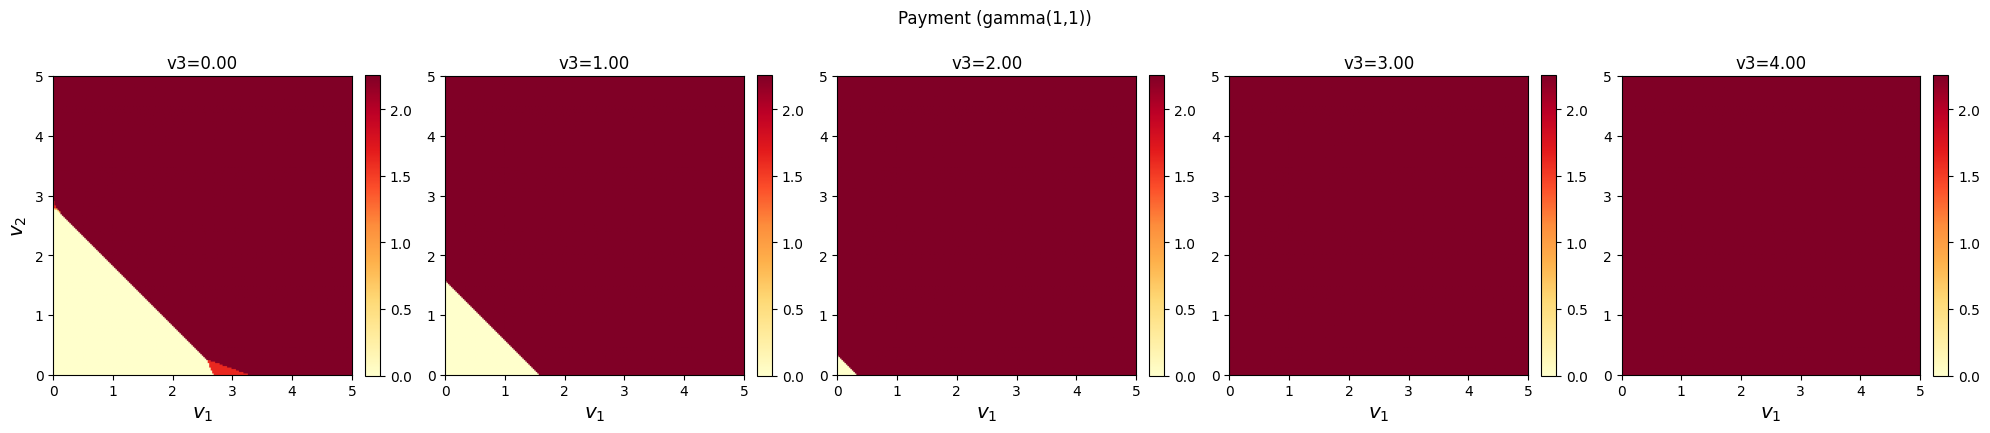

In [18]:
# Paymentを複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})

# すべてのv3値でのpaymentの最大値と最小値を計算（色スケール統一のため）
pay_min = min([np.min(pay_dict[v3_val]) for v3_val in v3_values])
pay_max = max([np.max(pay_dict[v3_val]) for v3_val in v3_values])

fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    pay = pay_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(pay[::-1, :], extent=[0, 5, 0, 5], cmap='YlOrRd', vmin=pay_min, vmax=pay_max)
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle('Payment (gamma(1,1))', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'pay_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


In [19]:
# Payment statistics（各v3値に対して）
v_max = x[-1]
print("Payment Statistics for each v3:")
for v3_val in v3_values:
    pay = pay_dict[v3_val]
    print(f"\nv3 = {v3_val:.2f}:")
    print(f"  Min: {np.min(pay):.6f}")
    print(f"  Max: {np.max(pay):.6f}")
    print(f"  Mean: {np.mean(pay):.6f}")
    print(f"  Median: {np.median(pay):.6f}")
    print(f"  Std: {np.std(pay):.6f}")
    print(f"  Payment at selected points:")
    print(f"    pay[0, 0] (v1=0, v2=0): {pay[0, 0]:.6f}")
    print(f"    pay[D//2, D//2] (v1={v_max/2:.1f}, v2={v_max/2:.1f}): {pay[D//2, D//2]:.6f}")
    print(f"    pay[-1, -1] (v1={v_max:.1f}, v2={v_max:.1f}): {pay[-1, -1]:.6f}")


Payment Statistics for each v3:

v3 = 0.00:
  Min: 0.000000
  Max: 2.255714
  Mean: 1.895481
  Median: 2.255714
  Std: 0.824158
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000000
    pay[D//2, D//2] (v1=2.0, v2=2.0): 2.255714
    pay[-1, -1] (v1=4.0, v2=4.0): 2.255714

v3 = 1.00:
  Min: 0.000000
  Max: 2.255714
  Mean: 2.143155
  Median: 2.255714
  Std: 0.491154
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000000
    pay[D//2, D//2] (v1=2.0, v2=2.0): 2.255714
    pay[-1, -1] (v1=4.0, v2=4.0): 2.255714

v3 = 2.00:
  Min: 0.000000
  Max: 2.255714
  Mean: 2.250634
  Median: 2.255714
  Std: 0.106935
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000000
    pay[D//2, D//2] (v1=2.0, v2=2.0): 2.255714
    pay[-1, -1] (v1=4.0, v2=4.0): 2.255714

v3 = 3.00:
  Min: 2.255714
  Max: 2.255714
  Mean: 2.255714
  Median: 2.255714
  Std: 0.000000
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 2.255714
    pay[D//2, D//2] (v1=2.0, v2=2.0): 2.255714